In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from numpy.random import randn
from numpy import random as rn
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
S0 = 2.521
r = 0.0326
sigma = 1.09
T = 1

In [3]:
M = 5000
N = 250

In [4]:
h = T/N

In [5]:
Z = rn.randn(M,N)
S = S0*np.ones((M,N+1))

In [6]:
for i in range(0,N):
    S[:,i+1] = S[:,i]*np.exp((r-sigma**2/2)*h+sigma*np.sqrt(h)*Z[:,i])

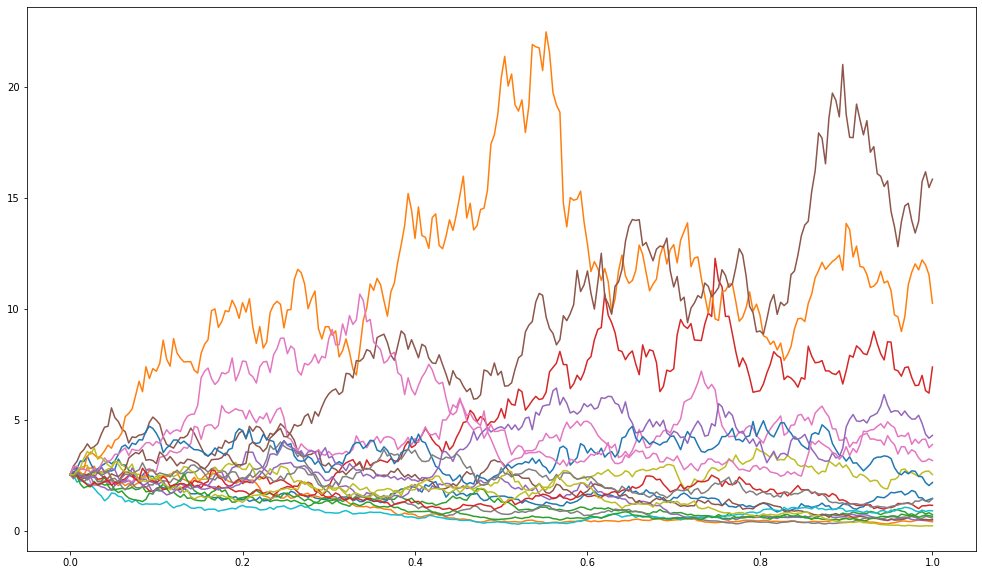

In [7]:
plt.figure(figsize=(17,10))
a = [ rn.randint(0,M) for j in range(1,20)]
for runer in a:
    plt.plot(np.arange(0,T+h,h),S[runer])

# Plain Vanilla Call Option

In [8]:
K = 1.251

In [9]:
#solution for A
V1 = np.exp(-r*T)*(S[:,-1]>K)*(S[:,-1]-K)
print("price of the call option is: {:.4f}, with a stochastic error of {:.3%}".format(np.mean(V1),np.std(V1)/np.sqrt(M)))

price of the call option is: 1.5911, with a stochastic error of 5.631%


In [10]:
Payoff = []
Positive_Payoff = 0
for i in range(0,M):
    if S[:,-1][i] > K:
        Payoff.append(S[:,-1][i]-K)
        Positive_Payoff +=1
    else:
        Payoff.append(0.0000)

In [11]:
PV = []
for i in range(0,M):
        PV.append(np.exp(-r*T)*Payoff[i])

In [12]:
Call = np.mean(PV)
print("The value of the plain vanilla call option is:","{:.4f}".format(Call))

The value of the plain vanilla call option is: 1.5911


In [13]:
Error = np.std(PV)/np.sqrt(M)
print("The value of the plain vanilla call option is:","{:.3%}".format(Error))

The value of the plain vanilla call option is: 5.631%


In [14]:
Prob = Positive_Payoff/M
print("The probability to exercise the plain vanilla call option is:","{:.2%}".format(Prob))

The probability to exercise the plain vanilla call option is: 55.10%


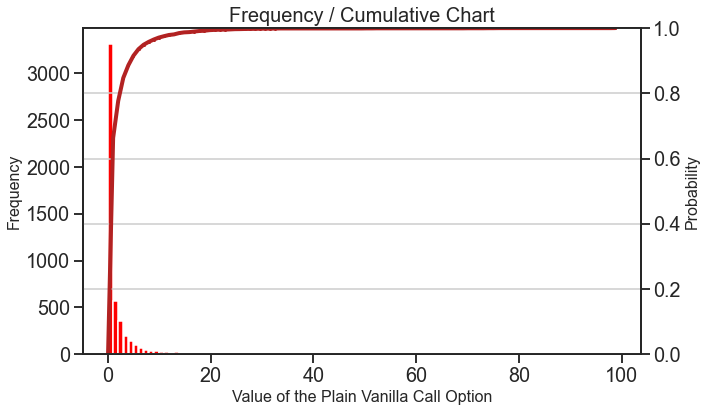

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class Histplot:
    def __init__(self, x_data, num_bins, linetype='ro-', title=None, xlabel=None, ylabels=None, fsize=(20, 20), df_line=1):
        """
        :param x_data: data x list
                 :param num_bins: the number of x groups
                 :param linetype: The style of the cumulative frequency curve, the default is red solid point
                 :param legends: legend name, default is "linear fitting result", "actual measured value"
                 :param xlabel: the name of the x axis title, default is "data x"
                 :param ylabels: double y axis title name, the default is "count", "cumulative frequency"
                 :param df_line: Whether to display the cumulative frequency curve
        """
        if title is None:
            title = "Frequency / Cumulative Chart"
        if xlabel is None:
            xlabel = "Value of the Plain Vanilla Call Option"
        if ylabels is None:
            ylabels = ["Frequency", "Probability"]
        self.x_data = x_data
        self.num_bins = num_bins
        self.linetype = linetype
        self.fsize = fsize
        self.title = title
        self.xlabel = xlabel
        self.ylabels = ylabels
        self.df_line = df_line

    def change_title(self, new_title):
        # Change the title name to new_legends
        self.title = new_title

    def change_ylabel(self, new_labels):
        # Change the title of the dual y axis to new_labels
        self.ylabels = new_labels

    def change_xlabel(self, new_label):
        # Change the x-axis axis title to new_label
        self.xlabel = new_label

    def change_linetype(self, new_linetype):
        # Change the format of the cumulative frequency line to new_lintype
        self.linetype = new_linetype

    def draw_plot(self):
        fs = self.fsize  # Canvas size
        # Use the seaborn library to set the font size uniformly, which is 0.12 times of fgsize[1], that is, when the vertical size of the canvas is 1000, font_scale=1.2
        sns.set_style("ticks")
        sns.set_context("talk", font_scale=fs[1]*0.2)

        # Set canvas
        fig, ax = plt.subplots(figsize=fs)

        # ax: draw frequency histogram, not selectable
        n, bins, patches = ax.hist(self.x_data, self.num_bins, color = "red", rwidth=0.9, label=self.title[0])
        ax.set_title(self.title, fontsize=20)
        ax.set_xlabel(self.xlabel, fontsize=16)
        ax.set_ylabel(self.ylabels[0],  fontsize=16)

        # ax2: Draw cumulative frequency curve, optional
        if self.df_line:
            leiji_n = [sum(n[:i]) / M for i in range(len(n) + 1)]
            ax2 = ax.twinx()
            ax2.plot(bins, leiji_n, self.linetype, ms=fs[0]*0.2, color="firebrick", linewidth=4, label=self.title[0])
            ax2.set_ylim(0, 1)
            ax2.set_ylabel(self.ylabels[1], fontsize=16)

        # Display multiple legends
        # fig.legend(loc=1, bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
        # fig.tight_layout()
        plt.grid()
        plt.show()


if __name__ == "__main__":
    bins = 100  # Data grouping
    plot1 = Histplot(PV, num_bins=bins, fsize=(10, 6))
    plot1.draw_plot()

# Plain Vanilla Put Option

In [16]:
K = 1.251

In [17]:
#solution for A
V2 = np.exp(-r*T)*(K>S[:,-1])*(K-S[:,-1])
print("price of the put option is: {:.4f}, with a stochastic error of {:.3%}".format(np.mean(V2),np.std(V2)/np.sqrt(M)))

price of the put option is: 0.2604, with a stochastic error of 0.501%


In [18]:
Payoff = []
Positive_Payoff = 0
for i in range(0,M):
    if K > S[:,-1][i]:
        Payoff.append(K-S[:,-1][i])
        Positive_Payoff +=1
    else:
        Payoff.append(0.0000)

In [19]:
PV = []
for i in range(0,M):
        PV.append(np.exp(-r*T)*Payoff[i])

In [20]:
Put = np.mean(PV)
print("The value of the plain vanilla put option is:","{:.4f}".format(Put))

The value of the plain vanilla put option is: 0.2604


In [21]:
Error1 = np.std(PV)/np.sqrt(M)
print("The value of the plain vanilla put option is:","{:.3%}".format(Error1))

The value of the plain vanilla put option is: 0.501%


In [22]:
Prob1 = Positive_Payoff/M
print("The probability to exercise the plain vanilla put option is:","{:.2%}".format(Prob1))

The probability to exercise the plain vanilla put option is: 44.90%


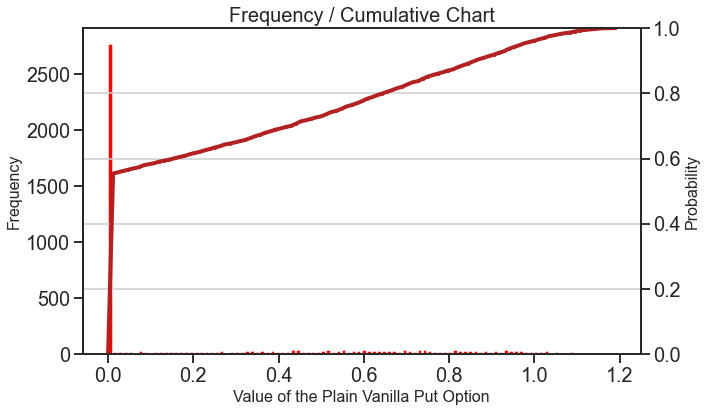

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class Histplot:
    def __init__(self, x_data, num_bins, linetype='ro-', title=None, xlabel=None, ylabels=None, fsize=(20, 20), df_line=1):
        """
        :param x_data: data x list
                 :param num_bins: the number of x groups
                 :param linetype: The style of the cumulative frequency curve, the default is red solid point
                 :param legends: legend name, default is "linear fitting result", "actual measured value"
                 :param xlabel: the name of the x axis title, default is "data x"
                 :param ylabels: double y axis title name, the default is "count", "cumulative frequency"
                 :param df_line: Whether to display the cumulative frequency curve
        """
        if title is None:
            title = "Frequency / Cumulative Chart"
        if xlabel is None:
            xlabel = "Value of the Plain Vanilla Put Option"
        if ylabels is None:
            ylabels = ["Frequency", "Probability"]
        self.x_data = x_data
        self.num_bins = num_bins
        self.linetype = linetype
        self.fsize = fsize
        self.title = title
        self.xlabel = xlabel
        self.ylabels = ylabels
        self.df_line = df_line

    def change_title(self, new_title):
        # Change the title name to new_legends
        self.title = new_title

    def change_ylabel(self, new_labels):
        # Change the title of the dual y axis to new_labels
        self.ylabels = new_labels

    def change_xlabel(self, new_label):
        # Change the x-axis axis title to new_label
        self.xlabel = new_label

    def change_linetype(self, new_linetype):
        # Change the format of the cumulative frequency line to new_lintype
        self.linetype = new_linetype

    def draw_plot(self):
        fs = self.fsize  # Canvas size
        # Use the seaborn library to set the font size uniformly, which is 0.12 times of fgsize[1], that is, when the vertical size of the canvas is 1000, font_scale=1.2
        sns.set_style("ticks")
        sns.set_context("talk", font_scale=fs[1]*0.2)

        # Set canvas
        fig, ax = plt.subplots(figsize=fs)

        # ax: draw frequency histogram, not selectable
        n, bins, patches = ax.hist(self.x_data, self.num_bins, color = "red", rwidth=0.9, label=self.title[0])
        ax.set_title(self.title, fontsize=20)
        ax.set_xlabel(self.xlabel, fontsize=16)
        ax.set_ylabel(self.ylabels[0],  fontsize=16)

        # ax2: Draw cumulative frequency curve, optional
        if self.df_line:
            leiji_n = [sum(n[:i]) / M for i in range(len(n) + 1)]
            ax2 = ax.twinx()
            ax2.plot(bins, leiji_n, self.linetype, ms=fs[0]*0.2, color="firebrick", linewidth=4, label=self.title[0])
            ax2.set_ylim(0, 1)
            ax2.set_ylabel(self.ylabels[1], fontsize=16)

        # Display multiple legends
        # fig.legend(loc=1, bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
        # fig.tight_layout()
        plt.grid()
        plt.show()


if __name__ == "__main__":
    bins = 100  # Data grouping
    plot1 = Histplot(PV, num_bins=bins, fsize=(10, 6))
    plot1.draw_plot()